# 1. Import and Install Dependencies

In [26]:
%pip install tensorflow opencv-python mediapipe scikit-learn matplotlib transformers


[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [30]:
%pip install tf-keras

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 2.5 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 239.6/239.6 MB 1.1 MB/s eta 0:00:0000:0100:05m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 405.1/405.1 kB 1.8 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 1.0 MB/s eta 0:00:0000:0100:010m
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.3.2
    Uninstalling ml-dtypes-0.3.2:
      Successfully uninstalled ml-dtypes-0.3.2
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.16.2
    Uninstalling tensorboard-2.16.2:
      Successfully uninstalled tensorboard-2.16.2
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.16.2
    Uninstalling tensorflow-2.16.2:
      Successfully uninstalled tensorflow-2.16.2

[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to res

In [2]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp
import tensorflow as tf

# 2. Keypoints using MP Holistic

In [4]:
mp_holistic = mp.solutions.holistic # Holistic model
mp_drawing = mp.solutions.drawing_utils # Drawing utilities

In [5]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # COLOR CONVERSION BGR 2 RGB
    image.flags.writeable = False                  # Image is no longer writeable
    results = model.process(image)                 # Make prediction
    image.flags.writeable = True                   # Image is now writeable
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # COLOR COVERSION RGB 2 BGR
    return image, results

In [17]:
def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_CONTOURS) # Draw face connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS) # Draw pose connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw right hand connections

In [7]:
def draw_styled_landmarks(image, results):
    # Draw face connections
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_CONTOURS,
                             mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1),
                             mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                             )
    # Draw pose connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4),
                             mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                             )
    # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4),
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                             )
    # Draw right hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4),
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                             )

In [8]:
# Initialize camera
cap = cv2.VideoCapture(0)

# Create a resizable window
cv2.namedWindow('OpenCV Feed', cv2.WINDOW_NORMAL)
# Set an initial window size (width=1280, height=720 for example)
cv2.resizeWindow('OpenCV Feed', 1280, 720)

with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break
         # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        # Draw landmarks
        draw_styled_landmarks(image,results)
        # Show the feed
        cv2.imshow('OpenCV Feed', image)

        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

cap.release()
cv2.destroyAllWindows()

I0000 00:00:1740029234.812548 1573844 gl_context.cc:369] GL version: 2.1 (2.1 Metal - 86), renderer: Apple M2
INFO: Created TensorFlow Lite XNNPACK delegate for CPU.
W0000 00:00:1740029235.043228 1575618 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1740029235.125537 1575625 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1740029235.130820 1575619 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1740029235.130992 1575623 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1740029235.131366 1575618 inference_feedback_manager.cc:114] Feedback manager requires a model

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [9]:
draw_styled_landmarks(frame,results)

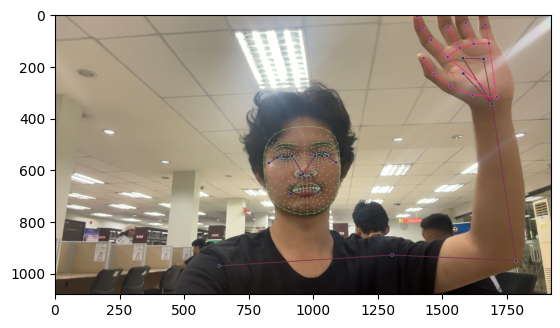

In [10]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

# 3. Extract Keypoint Values

In [11]:
pose = []
for res in results.pose_landmarks.landmark:
    test = np.array([res.x, res.y, res.z, res.visibility])
    pose.append(test)

In [12]:
pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)

In [13]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, lh, rh])

In [14]:
result_test = extract_keypoints(results)

In [15]:
result_test

array([ 0.49925381,  0.57061327, -0.66499275, ...,  0.        ,
        0.        ,  0.        ])

In [16]:
np.save('0', result_test)

In [17]:
np.load('0.npy')

array([ 0.49925381,  0.57061327, -0.66499275, ...,  0.        ,
        0.        ,  0.        ])

# 4. Setup Folders for Collection

In [18]:
import json

In [19]:
# Path for exported data, numpy arrays
DATA_PATH = 'MY_DATA'

# # Load the list of words from word_list.json
# with open('words_list.json', 'r') as file:
#     data = json.load(file)
#     actions = np.array(data["doctor_patient_words"])

actions = np.array(['hello', 'thanks', 'iloveyou'])

# Thirty videos worth of data
no_sequences = 30

# Videos are going to be 30 frames in length
sequence_length = 30

# Folder start
start_folder = 30

# Print actions to verify
print(actions)

['hello' 'thanks' 'iloveyou']


In [20]:
for action in actions:
    for sequence in range(no_sequences):
        try:
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
        except:
            pass

# 5. Collect Keypoint Values for Training and Testing

In [21]:
def get_start_sequence(action_path):
    existing = []
    # Loop over the folders in the action_path
    for seq in os.listdir(action_path):
        if seq.isdigit():
            seq_path = os.path.join(action_path, seq)
            # Check if the folder contains any .npy files
            npy_files = [f for f in os.listdir(seq_path) if f.endswith('.npy')]
            if npy_files:
                existing.append(int(seq))
    if existing:
        return max(existing) + 1  # Resume from the next sequence number
    else:
        return 0


In [22]:

# Save the current action and sequence to a JSON file.
def save_checkpoint(action, sequence, checkpoint_file="checkpoint.json"):
    checkpoint = {"action": action, "sequence": sequence}
    with open(checkpoint_file, "w") as f:
        json.dump(checkpoint, f)

# Load the checkpoint, returning (action, sequence) if it exists.
def load_checkpoint(checkpoint_file="checkpoint.json"):
    if os.path.exists(checkpoint_file):
        with open(checkpoint_file, "r") as f:
            checkpoint = json.load(f)
            return checkpoint.get("action"), checkpoint.get("sequence")
    return None, 0

In [1]:
cap = cv2.VideoCapture(0)
paused = False  # Flag to control pausing

with mp.solutions.holistic.Holistic(min_detection_confidence=0.5,
                                    min_tracking_confidence=0.5) as holistic:
    # Loop through each action (word)
    for action in actions:
        action_path = os.path.join(DATA_PATH, action)
        start_sequence = get_start_sequence(action_path)
        print(f"Resuming {action} at sequence {start_sequence} out of {no_sequences}")

        # Loop through sequences aka videos for the current action
        for sequence in range(start_sequence, no_sequences):
            sequence_path = os.path.join(action_path, str(sequence))
            # Create the sequence folder if it doesn't exist
            if not os.path.exists(sequence_path):
                os.makedirs(sequence_path)

            # Loop through frames in the video
            for frame_num in range(sequence_length):

                # Read feed
                ret, frame = cap.read()
                if not ret:
                    continue

                # Process the frame with mediapipe
                image, results = mediapipe_detection(frame, holistic)
                draw_styled_landmarks(image, results)

                # Display instructions on the first frame of each sequence
                if frame_num == 0:
                    cv2.putText(image, 'STARTING COLLECTION', (120,200),
                                cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255,0), 4, cv2.LINE_AA)
                    cv2.putText(image, f'Collecting frames for {action} Video Number {sequence}',
                                (15,12), cv2.FONT_HERSHEY_SIMPLEX, 1, (0,0,255), 2, cv2.LINE_AA)
                    cv2.imshow('OpenCV Feed', image)
                    cv2.waitKey(1500)  # Initial wait time
                else:
                    cv2.putText(image, f'Collecting frames for {action} Video Number {sequence}',
                                (15,12), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,0,255), 1, cv2.LINE_AA)
                    cv2.imshow('OpenCV Feed', image)

                # Check for pause key
                key = cv2.waitKey(10) & 0xFF
                if key == ord('p'):
                    paused = not paused
                    while paused:
                        # Display PAUSED overlay
                        cv2.putText(image, 'PAUSED', (200,200),
                                    cv2.FONT_HERSHEY_SIMPLEX, 1, (0,0,255), 2, cv2.LINE_AA)
                        cv2.imshow('OpenCV Feed', image)
                        key2 = cv2.waitKey(100) & 0xFF
                        # Press 'p' again to resume
                        if key2 == ord('p'):
                            paused = False

                # NEW Export keypoints only if not paused
                if not paused:
                    keypoints = extract_keypoints(results)
                    npy_path = os.path.join(sequence_path, f"{frame_num}")
                    np.save(npy_path, keypoints)

                # Break gracefully if 'q' is pressed
                if key == ord('q'):
                    break

    cap.release()
    cv2.destroyAllWindows()


NameError: name 'cv2' is not defined

In [71]:
cap.release()
cv2.destroyAllWindows()

# 6. Preprocess Data and Create Labels and Features

In [72]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical # type: ignore

In [20]:
label_map = {label:num for num, label in enumerate(actions)}

In [70]:
label_map

{'hello': 0, 'thanks': 1, 'iloveyou': 2}

In [22]:
sequences, labels = [], []
for action in actions:
    for sequence in np.array(os.listdir(os.path.join(DATA_PATH, action))).astype(int):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [23]:
np.array(sequences).shape

(90, 30, 1662)

In [24]:
np.array(labels).shape

(90,)

In [25]:
X = np.array(sequences)

In [26]:
X.shape

(90, 30, 1662)

In [27]:
y = to_categorical(labels).astype(int)

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)

In [29]:
y_test.shape

(5, 3)

# 7. Build and Train LSTM Neural Network

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.callbacks import EarlyStopping

In [32]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [49]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30,1662)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

In [50]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [34]:
model.fit(X_train, y_train, epochs=2000, callbacks=[tb_callback])

Epoch 1/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - categorical_accuracy: 0.7006 - loss: 0.4889
Epoch 2/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - categorical_accuracy: 0.8532 - loss: 0.4533
Epoch 3/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - categorical_accuracy: 0.7711 - loss: 0.4718
Epoch 4/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - categorical_accuracy: 0.8845 - loss: 0.4232
Epoch 5/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - categorical_accuracy: 0.7789 - loss: 0.4728
Epoch 6/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - categorical_accuracy: 0.8161 - loss: 0.4527
Epoch 7/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - categorical_accuracy: 0.8415 - loss: 0.4399
Epoch 8/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - categorical_accuracy: 0.8610 - loss: 0.3930
Epoch 9/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - categorical_accuracy: 0.8415 - loss: 0.4354
Epoch 10/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - categorical_accuracy: 0.7926 - loss: 0.4286
Epoch 11/2000
3/3 ━━━━━━━━━━━

KeyboardInterrupt: 

In [35]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 30, 64)         │       442,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 30, 128)        │        98,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 3)              │            99 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,790,027 (6.83 MB)

 Trainable params: 596,675 (2.28 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,193,352 (4.55 MB)

# 8. Make Predictions

In [36]:
res = model.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step


In [43]:
actions[np.argmax(res[2])]

'thanks'

In [44]:
actions[np.argmax(y_test[2])]

'thanks'

# 9. Save Weights

In [46]:
model.save('action.keras')

In [47]:
del model

In [51]:
model.load_weights('action.keras')

/Users/wincedelafuente/Documents/ActionDetectionforSignLanguage/myenv/lib/python3.12/site-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 32 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


# 10. Evaluation using Confusion Matrix and Accuracy

In [52]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [57]:
yhat = model.predict(X_train)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step 


In [58]:
ytrue = np.argmax(y_train, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [59]:
multilabel_confusion_matrix(ytrue, yhat)

array([[[44, 12],
        [ 0, 29]],

       [[57,  0],
        [ 1, 27]],

       [[56,  1],
        [12, 16]]])

In [60]:
accuracy_score(ytrue, yhat)

0.8470588235294118

# 11. Test in Real Time

In [61]:
from scipy import stats

In [62]:
colors = [(245,117,16), (117,245,16), (16,117,245)]
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)

    return output_frame

In [63]:
plt.figure(figsize=(18,18))
plt.imshow(prob_viz(res, actions, image, colors))

TypeError: only length-1 arrays can be converted to Python scalars

<Figure size 1800x1800 with 0 Axes>

In [ ]:
# 1. New detection variables
sequence = []
sentence = []
predictions = []
threshold = 0.5

cap = cv2.VideoCapture(0)
# Set mediapipe model
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)

        # Draw landmarks
        draw_styled_landmarks(image, results)

        # 2. Prediction logic
        keypoints = extract_keypoints(results)
        sequence.append(keypoints)
        sequence = sequence[-30:]

        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            predictions.append(np.argmax(res))


        #3. Viz logic
            if np.unique(predictions[-10:])[0]==np.argmax(res):
                if res[np.argmax(res)] > threshold:

                    if len(sentence) > 0:
                        if actions[np.argmax(res)] != sentence[-1]:
                            sentence.append(actions[np.argmax(res)])
                    else:
                        sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5:
                sentence = sentence[-5:]

            # Viz probabilities
            image = prob_viz(res, actions, image, colors)

        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30),
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)

        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

# 12 Train Gpt2 model

In [3]:
%pip install datasets torch torchvision torchaudio 'accelerate>=0.26.0'


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 342.1/342.1 kB 2.0 MB/s eta 0:00:0000:0100:01m

[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [1]:
from transformers import GPT2LMHeadModel, GPT2Tokenizer, Trainer, TrainingArguments, DataCollatorForLanguageModeling
from datasets import load_dataset

In [26]:
# Load pre-trained GPT-2 tokenizer and model
tokenizer = GPT2Tokenizer.from_pretrained("gpt2")

################################################################################
# Use the EOS token as a pad token (simple approach)
################################################################################
tokenizer.pad_token = tokenizer.eos_token

model = GPT2LMHeadModel.from_pretrained("gpt2")

# (Optional) Add special tokens like "=>"
special_tokens_dict = {'additional_special_tokens': ['=>']}
tokenizer.add_special_tokens(special_tokens_dict)
model.resize_token_embeddings(len(tokenizer))

# Load your training data from a text file.
data_files = {"train": "train.txt"}
dataset = load_dataset("text", data_files=data_files)

def tokenize_function(examples):
    return tokenizer(examples["text"], truncation=True, max_length=512)

tokenized_datasets = dataset.map(tokenize_function, batched=True, remove_columns=["text"])

data_collator = DataCollatorForLanguageModeling(tokenizer=tokenizer, mlm=False)

training_args = TrainingArguments(
    output_dir="./gpt2_finetuned_signlang",
    overwrite_output_dir=True,
    num_train_epochs=3,
    per_device_train_batch_size=2,
    save_steps=500,
    save_total_limit=2,
    prediction_loss_only=True,
)

trainer = Trainer(
    model=model,
    args=training_args,
    data_collator=data_collator,
    train_dataset=tokenized_datasets["train"],
)

trainer.train()

model.save_pretrained("./gpt2_finetuned_signlang")
tokenizer.save_pretrained("./gpt2_finetuned_signlang")

Generating train split: 0 examples [00:00, ? examples/s]

Map:   0%|          | 0/306 [00:00<?, ? examples/s]

Step,Training Loss


('./gpt2_finetuned_signlang/tokenizer_config.json',
 './gpt2_finetuned_signlang/special_tokens_map.json',
 './gpt2_finetuned_signlang/vocab.json',
 './gpt2_finetuned_signlang/merges.txt',
 './gpt2_finetuned_signlang/added_tokens.json')

# 13 Transform detected words into a sentence

In [19]:
from transformers import pipeline
import re

In [33]:
generator = pipeline(
    "text-generation",
    model="./gpt2_finetuned_signlang",
    tokenizer="./gpt2_finetuned_signlang",
    pad_token_id=tokenizer.eos_token_id
)

def generate_sentence_from_words(detected_words):
    gloss = " ".join(detected_words)
    prompt = f"{gloss} =>"
    prompt_length = len(tokenizer(prompt)['input_ids'])
    max_new_tokens = 20  # Adjust as needed

    generated_outputs = generator(
        prompt,
        max_length=prompt_length + max_new_tokens,
        num_return_sequences=1,
        truncation=True,
        do_sample=False,          # Deterministic output
        num_beams=5,
        early_stopping=True,
        no_repeat_ngram_size=2,
        repetition_penalty=1.2,
        length_penalty=1.0,
        return_full_text=True
    )

    generated_text = generated_outputs[0]["generated_text"].strip()
    translation = generated_text[len(prompt):].strip()

    # Truncate at the first sentence-ending punctuation.
    sentence_end = re.search(r'[.?!]', translation)
    if sentence_end:
        translation = translation[:sentence_end.end()].strip()

    return translation

Device set to use mps:0


In [37]:
# Example usage:
dummy_detected_words1 = ["name","you", "what"]
generated_sentence1 = generate_sentence_from_words(dummy_detected_words1)
print("Detected words:", dummy_detected_words1)
print("Generated sentence:", generated_sentence1)

dummy_detected_words2 = ["have", "questions"]
generated_sentence2 = generate_sentence_from_words(dummy_detected_words2)
print("Detected words:", dummy_detected_words2)
print("Generated sentence:", generated_sentence2)

Detected words: ['name', 'you', 'what']
Generated sentence: what is your name?
Detected words: ['have', 'questions']
Generated sentence: do you have any questions?
